In [12]:
import seaborn as sns
import numpy as np
from scipy.special import expit
import matplotlib.pyplot as plt
import torch
from torch.nn import functional as F

In [47]:
x = torch.linspace(-5, 5, 100)

In [49]:
relog_func = lambda x, b: torch.log1p(b*F.relu(x)) / b

class ReLog(object):
    def __init__(self, beta):
        self.beta = beta
    def __call__(self, x):
        return relog_func(x, self.beta)

def d(f, x):
    x = torch.tensor(x, requires_grad=True)
    s = f(x).sum()
    s.backward()
    return x.grad.numpy()

In [55]:
data = {
    'ReLU': F.relu(x),
    'Sigmoid': torch.sigmoid(x),
    'ReLog beta=0.5': ReLog(beta=0.5)(x),
    'ReLog beta=1': ReLog(beta=1)(x),
    'ReLog beta=2': ReLog(beta=2)(x),
    'ReLog beta=5': ReLog(beta=5)(x),
}

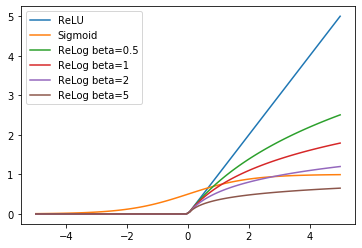

In [56]:
for label, vals in data.items():
    plt.plot(x, vals, label=label)
plt.legend(loc=2)
None

The advantages of this compare to $log_n(x + 1/n)+1$ is that it is a generalization of relu and its gradient well-behaves. It doesn't have a fixed point other than the origin but, empirically, that doesn't seem to matter.

The biggest problem is that it doesn't look anything like a decision function, i.e. it doesn't really have a saturation region...

In [57]:
data = {
    'ReLU': d(F.relu, x),
    'Sigmoid': d(torch.sigmoid, x),
    'ReLog beta=0.5': d(ReLog(beta=0.5), x),
    'ReLog beta=1': d(ReLog(beta=1), x),
    'ReLog beta=2': d(ReLog(beta=2), x),
    'ReLog beta=5': d(ReLog(beta=5), x),
}

/Users/cumeo/anaconda3/envs/newlogic/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # Remove the CWD from sys.path while we load stuff.


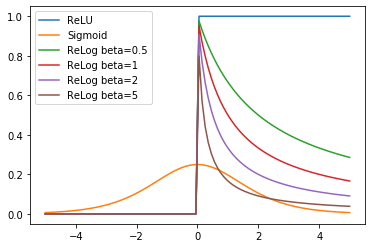

In [58]:
for label, vals in data.items():
    plt.plot(x, vals, label=label)
plt.legend(loc=2)
None